In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

## Big model

Test the big model trained on 299x299 pictures. 

In [4]:
image_size = (299, 299)

In [7]:
model = keras.models.load_model('xception_v4_large_07_0.860.h5')

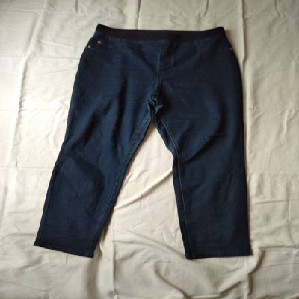

In [9]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

pre-process the image:

In [11]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

And get the prediction:

In [13]:
pred = model.predict(X)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([-0.8442652 , -2.150672  , -2.0417306 , -1.0589635 ,  7.294027  ,
        0.90650684, -4.3718333 ,  3.5340266 , -2.911549  , -2.888299  ],
      dtype=float32)

To the actual class, we need to see what's the biggest value. We do it by using argmax:

In [14]:
pred[0].argmax()

4

To convert it to the label, let's use the labels dictionary:

In [15]:
labels[pred[0].argmax()]

'pants'

Now let's apply it to the entire testing dataset

- first, we'll create a generator
- then use the `evaluate` function to get accuracy 

In [16]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 373 images belonging to 10 classes.


In [17]:
model.evaluate(test_ds)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.8666 - loss: 0.3928


[0.3330270051956177, 0.887399435043335]

## Small model

After testing the big model, Test the small model trained on 150x150 images

In [24]:
model = keras.models.load_model('xception_v3_41_0.763.h5')

In [25]:
image_size = (150, 150)

In [28]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 373 images belonging to 10 classes.


In [30]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 892ms/step - accuracy: 0.6333 - loss: 1.3206


[0.9100833535194397, 0.7345844507217407]